# CSCI Project

### By: Brice Jarvis 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [2]:
fund = pd.read_csv("data/fundamentals.csv",index_col=0)
sec = pd.read_csv("data/securities.csv")
price = pd.read_csv("data/prices-split-adjusted.csv", parse_dates=['date'])
price = price.set_index("date")

In [3]:
print(sec["GICS Sector"].unique())

['Industrials' 'Health Care' 'Information Technology'
 'Consumer Discretionary' 'Utilities' 'Financials' 'Materials'
 'Consumer Staples' 'Real Estate' 'Energy' 'Telecommunications Services']


In [4]:
sum(sec["GICS Sector"] == "Telecommunications Services")

5

In [5]:
company = ["T","CTL","FTR","LVLT","VZ"]

In [6]:
sec = sec[sec["GICS Sector"] == "Telecommunications Services"]

In [7]:
fund = fund.loc[fund["Ticker Symbol"].isin(company)]

In [8]:
price = price.loc[price["symbol"].isin(company)]

In [9]:
sec

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
51,T,AT&T Inc,reports,Telecommunications Services,Integrated Telecommunications Services,"Dallas, Texas",1983-11-30,732717
92,CTL,CenturyLink Inc,reports,Telecommunications Services,Integrated Telecommunications Services,"Monroe, Louisiana",NaN,18926
201,FTR,Frontier Communications,reports,Telecommunications Services,Integrated Telecommunications Services,"Stamford, Connecticut",NaN,20520
274,LVLT,Level 3 Communications,reports,Telecommunications Services,Alternative Carriers,"Broomfield, Colorado",2014-11-05,794323
472,VZ,Verizon Communications,reports,Telecommunications Services,Integrated Telecommunications Services,"New York, New York",1983-11-30,732712


In [10]:
price

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,CTL,36.540001,36.660000,36.369999,37.000000,2068100.0
2010-01-04,FTR,7.890000,7.960000,7.860000,8.000000,4030400.0
2010-01-04,LVLT,22.950000,24.150000,22.650000,24.150000,11418500.0
2010-01-04,T,28.410000,28.580000,28.280001,28.610001,29136600.0
2010-01-04,VZ,31.328709,31.216151,31.037932,31.375608,16176600.0
...,...,...,...,...,...,...
2016-12-30,CTL,24.020000,23.780001,23.680000,24.180000,6939000.0
2016-12-30,FTR,3.380000,3.380000,3.350000,3.420000,20394600.0
2016-12-30,LVLT,56.919998,56.360001,56.180000,57.139999,1679200.0


In [11]:
price.describe()

,open,close,low,high,volume
count,8810.000000,8810.000000,8810.000000,8810.000000,8.810000e+03
mean,30.199985,30.197967,29.912211,30.465724,1.378897e+07
std,14.914843,14.920919,14.821544,15.005555,1.534696e+07
min,3.150000,3.120000,3.060000,3.220000,1.544000e+05
25%,21.252500,21.230000,20.860001,21.617500,4.288775e+06
50%,33.685000,33.685000,33.430000,33.970001,1.075950e+07
75%,40.335000,40.349998,39.997501,40.607500,1.935745e+07
max,57.250000,57.200001,56.650002,57.590000,6.166205e+08


In [12]:
fund.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,2.000000e+01
mean,1.090812e+10,-6.415094e+08,-4.816155e+07,18.700000,-8.354375e+09,3.076643e+10,61.350000,5.480549e+09,-1.555000e+07,1.541250e+09,...,1.470885e+10,1.496406e+10,2.992625e+10,9.908145e+10,1.290077e+11,5.753739e+10,-7.905887e+09,2013.500000,1.584500,2.051430e+09
std,1.279898e+10,8.867498e+08,5.445477e+08,28.247217,8.676151e+09,3.207977e+10,111.786109,1.177657e+10,4.813411e+07,2.548546e+09,...,1.802663e+10,1.622412e+10,3.723283e+10,1.003932e+11,1.301501e+11,6.014463e+10,1.518527e+10,1.147079,2.483331,2.203536e+09
min,7.601340e+08,-2.745000e+09,-1.194000e+09,1.000000,-2.119900e+10,3.990000e+09,3.000000,1.260000e+08,-1.360000e+08,2.000000e+06,...,1.415000e+09,1.301587e+09,1.171000e+09,1.146300e+10,1.287400e+10,4.762000e+09,-4.702900e+10,2012.000000,-1.960000,-4.272727e+08
25%,1.081750e+09,-1.041000e+09,-1.495000e+08,3.750000,-1.733700e+10,1.118575e+10,10.750000,6.252500e+08,0.000000e+00,2.569970e+08,...,1.818750e+09,1.739880e+09,5.237399e+09,1.444275e+10,2.041275e+10,6.360250e+09,-4.907250e+09,2012.750000,0.125000,3.477951e+08
50%,3.133000e+09,-1.585000e+08,-6.111550e+07,6.500000,-2.983000e+09,1.683350e+10,27.000000,1.164470e+09,0.000000e+00,3.610000e+08,...,3.772500e+09,4.502000e+09,1.454150e+10,3.433800e+10,5.044500e+10,1.806300e+10,-3.160750e+08,2013.500000,1.240000,6.487310e+08
75%,1.735050e+10,-4.350000e+07,4.650000e+07,22.500000,-8.478760e+08,3.795175e+10,56.500000,4.931250e+09,0.000000e+00,5.945000e+08,...,2.282850e+10,2.893700e+10,3.457675e+10,1.958282e+11,2.515588e+11,1.271678e+11,0.000000e+00,2014.250000,2.382500,4.003445e+09
max,4.018000e+10,6.200000e+07,1.581000e+09,109.000000,-6.350000e+08,9.110800e+10,496.000000,5.352800e+10,5.600000e+07,6.495000e+09,...,7.099400e+10,4.781600e+10,1.226710e+11,2.800010e+11,4.026720e+11,1.468010e+11,0.000000e+00,2015.000000,9.710000,5.811200e+09


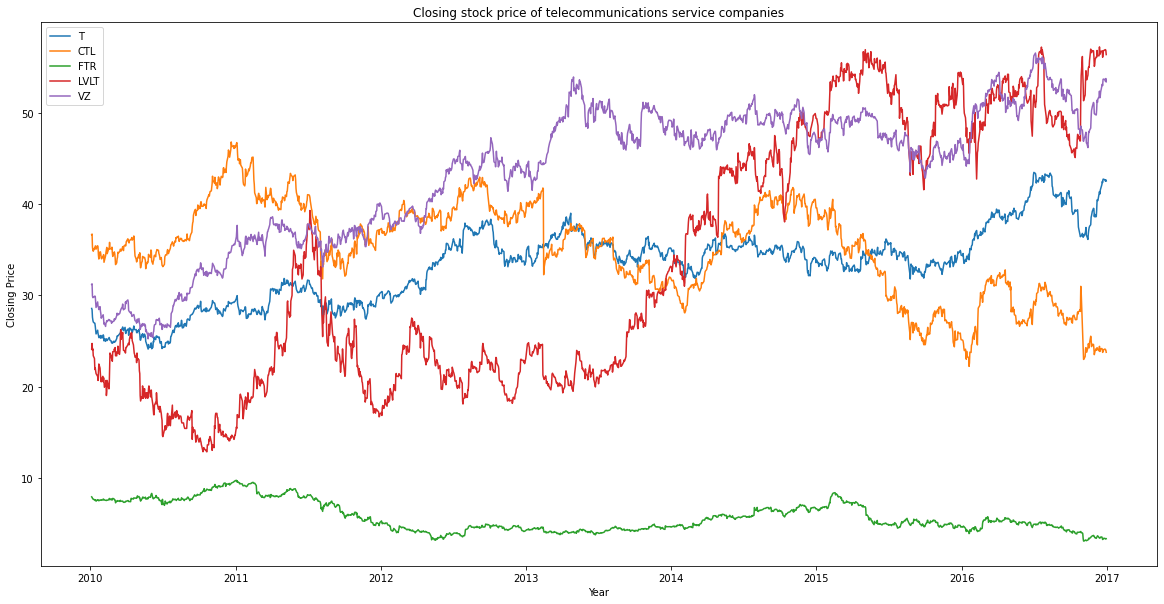

In [13]:
plt.figure(figsize=(20, 10))
for i in company:
    x1 = price[price["symbol"] == i]
    plt.plot(x1["close"])
    plt.legend(labels=company)
    plt.xlabel("Year")
    plt.ylabel("Closing Price")
    plt.title("Closing stock price of telecommunications service companies")

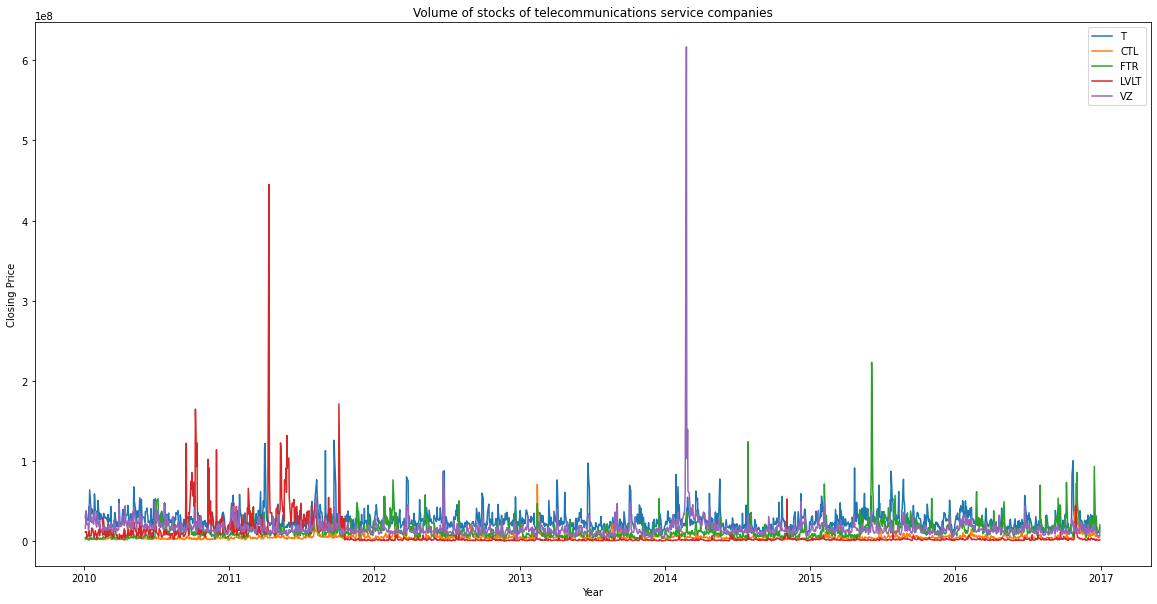

In [14]:
plt.figure(figsize=(20, 10))
for i in company:
    x1 = price[price["symbol"] == i]
    plt.plot(x1["volume"])
    plt.legend(labels=company)
    plt.xlabel("Year")
    plt.ylabel("Closing Price")
    plt.title("Volume of stocks of telecommunications service companies")

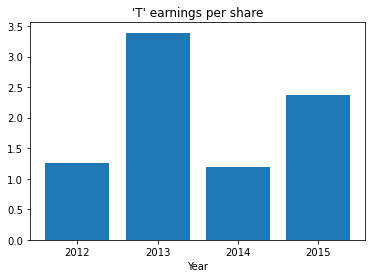

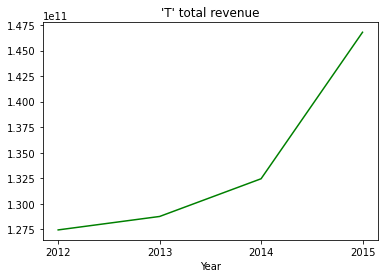

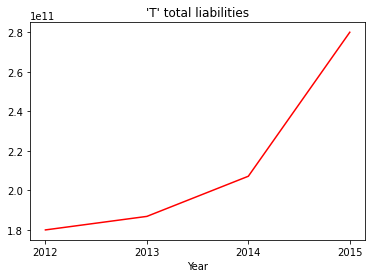

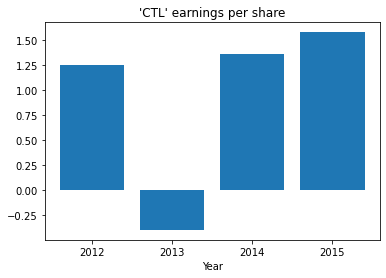

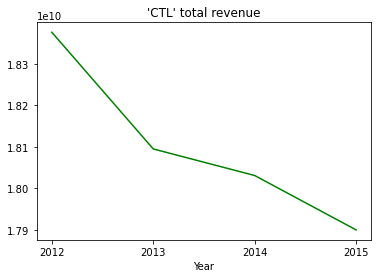

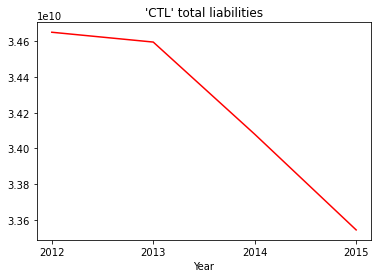

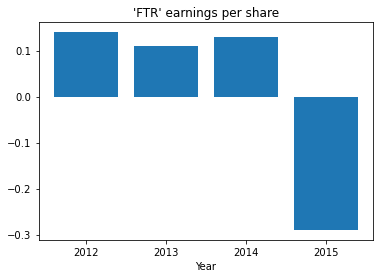

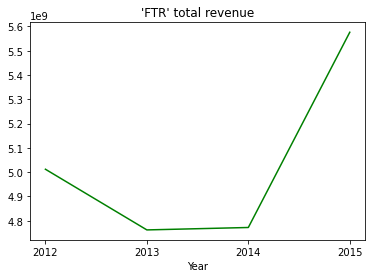

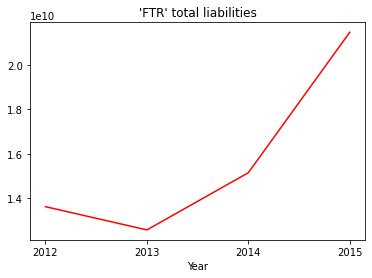

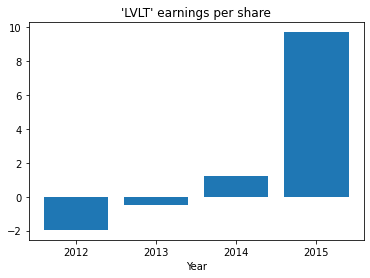

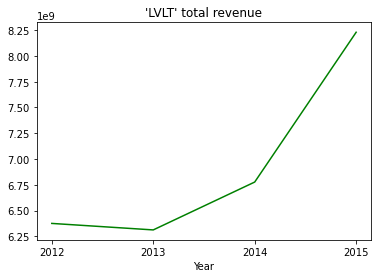

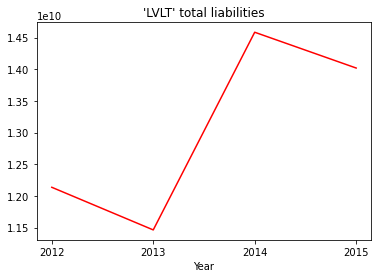

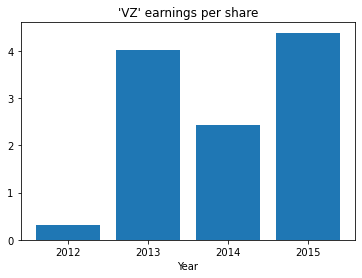

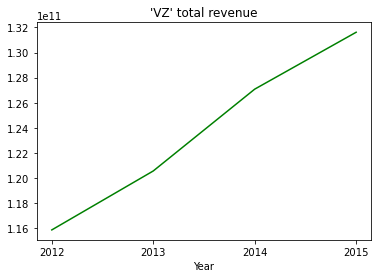

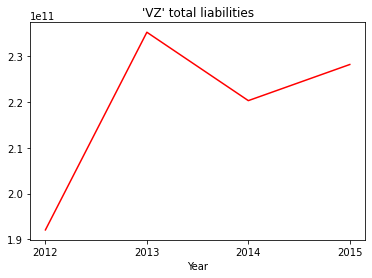

In [15]:
for i in company:
    x = fund[fund["Ticker Symbol"]==i]
    
    # bar for Earnings Per Share
    plt.bar(x["For Year"],x["Earnings Per Share"])
    plt.title(f"'{i}' earnings per share")
    plt.xticks(x["For Year"])
    plt.xlabel("Year")
    plt.show()
    
    #plot for Total Revenue
    plt.plot(x["For Year"],x["Total Revenue"],c="g")
    plt.title(f"'{i}' total revenue")
    plt.xticks(x["For Year"])
    plt.xlabel("Year")
    plt.show()
    
    #plot for Total Liabilities
    plt.plot(x["For Year"],x["Total Liabilities"],c="r")
    plt.title(f"'{i}' total liabilities")
    plt.xticks(x["For Year"])
    plt.xlabel("Year")
    plt.show()

## Analysis 1

In [16]:
price1 = price[price["symbol"]=="T"]   
price1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,33.277049,33.278939,33.048524,33.489251,2.634737e+07
std,4.162984,4.176893,4.157460,4.184007,1.192002e+07
min,24.010000,24.129999,23.780001,24.389999,6.862400e+06
25%,30.052499,30.042500,29.879999,30.162500,1.957655e+07
50%,33.939999,33.950001,33.750000,34.200001,2.372995e+07
75%,35.660000,35.619999,35.410000,35.849998,2.967652e+07
max,43.500000,43.470001,43.330002,43.889999,1.259987e+08


In [17]:
price1['volume'] = price1['volume'].shift(-1)
price1['high'] = price1['high'].shift(-1)
price1['low'] = price1['low'].shift(-1)
price1 = price1[:-1]
price1

<ipython-input-17-1bc52211f3aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price1['volume'] = price1['volume'].shift(-1)
<ipython-input-17-1bc52211f3aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price1['high'] = price1['high'].shift(-1)
<ipython-input-17-1bc52211f3aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,T,28.410000,28.580000,28.350000,28.730000,35234500.0
2010-01-05,T,28.700001,28.440001,27.549999,28.030001,37894600.0
2010-01-06,T,27.950001,27.610001,27.120001,27.690001,33600300.0
2010-01-07,T,27.580000,27.299999,26.879999,27.389999,27633400.0
2010-01-08,T,27.290001,27.100000,26.850000,27.219999,25791200.0
...,...,...,...,...,...,...
2016-12-22,T,42.240002,42.720001,42.470001,42.799999,9645400.0
2016-12-23,T,42.790001,42.730000,42.520000,42.840000,11432700.0
2016-12-27,T,42.730000,42.650002,42.470001,42.820000,11026900.0


In [18]:
X=price1[['volume','open']]
y=price1['close']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=False, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
from sklearn import datasets, linear_model
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)

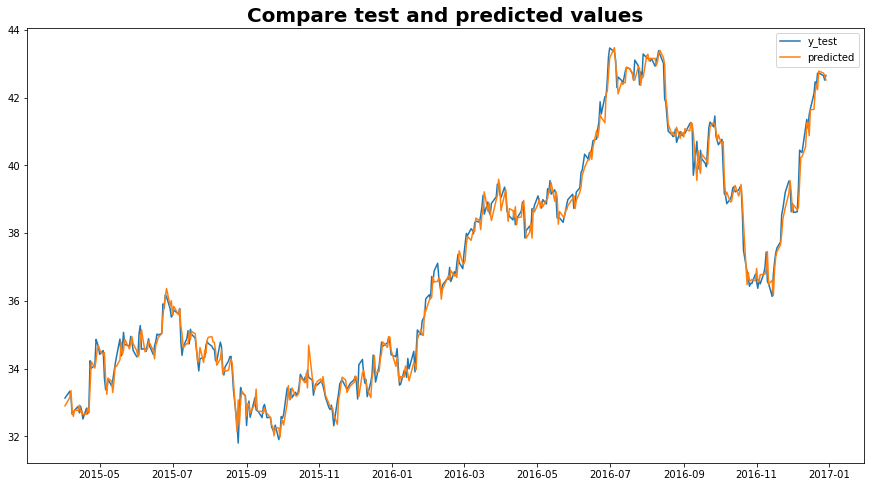

In [22]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.show()

In [23]:
print(f"Accuracy : {sc} ")
print(f"R2 Score : {r2} ")
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Accuracy : 99.0 
R2 Score : 0.99 
Intercept: 
 32.05037119924243
Coefficients: 
 [-0.01456446  3.67888033]


## Analysis 2

In [24]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train,y_train)
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)

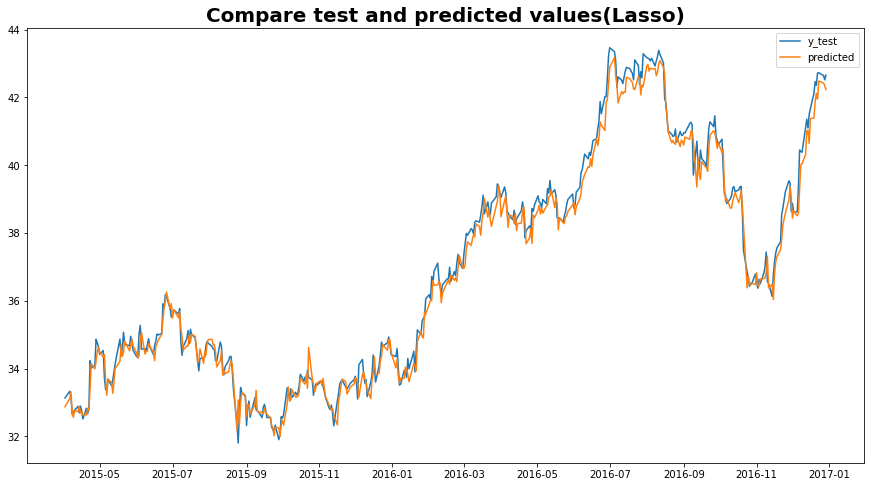

In [25]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values(Lasso)", size=20, weight='bold')
plt.show()

In [26]:
print(f"Accuracy : {sc} ")
print(f"R2 Score : {r2} ")
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Accuracy : 99.0 
R2 Score : 0.99 
Intercept: 
 32.05037119924243
Coefficients: 
 [-0.          3.58147241]


## Analysis 3

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

In [28]:
X=price1[['high','open','low']]
y=price1['close']

In [29]:
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
length=100
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/100
29/29 [==============================] - 12s 192ms/step - loss: 0.0772 - val_loss: 0.0259
Epoch 2/100
29/29 [==============================] - 4s 141ms/step - loss: 0.0108 - val_loss: 0.0138
Epoch 3/100
29/29 [==============================] - 4s 138ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 4/100
29/29 [==============================] - 4s 139ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 5/100
29/29 [==============================] - 4s 139ms/step - loss: 0.0090 - val_loss: 0.0209
Epoch 6/100
29/29 [==============================] - 4s 140ms/step - loss: 0.0072 - val_loss: 0.0096
Epoch 7/100
29/29 [==============================] - 4s 144ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 8/100
29/29 [==============================] - 4s 146ms/step - loss: 0.0066 - val_loss: 0.0128
Epoch 9/100
29/29 [==============================] - 4s 145ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 10/100
29/29 [==============================] - 4s 141ms/step - loss: 0.0063 - val_l

29/29 [==============================] - 5s 169ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 82/100
29/29 [==============================] - 6s 220ms/step - loss: 0.0023 - val_loss: 0.0058
Epoch 83/100
29/29 [==============================] - 5s 159ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 84/100
29/29 [==============================] - 5s 179ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 85/100
29/29 [==============================] - 5s 181ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 86/100
29/29 [==============================] - 5s 168ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 87/100
29/29 [==============================] - 6s 198ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 88/100
29/29 [==============================] - 5s 166ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 89/100
29/29 [==============================] - 6s 191ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 90/100
29/29 [==============================] - 6s 194ms/step - loss: 0.0023 - val_loss: 

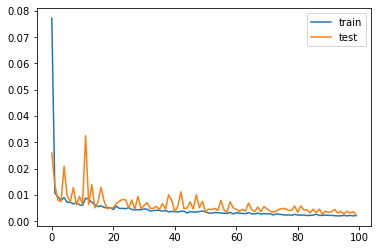

In [30]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit 
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# plot 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
pred = model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

21/21 [==============================] - 2s 36ms/step


,test,pred
0,0.818617,0.837288
1,0.774812,0.835613
2,0.760438,0.821850
3,0.763860,0.800086
4,0.753594,0.780556
...,...,...
656,1.260096,1.170711
657,1.262834,1.172606
658,1.261465,1.171175
659,1.260096,1.168672


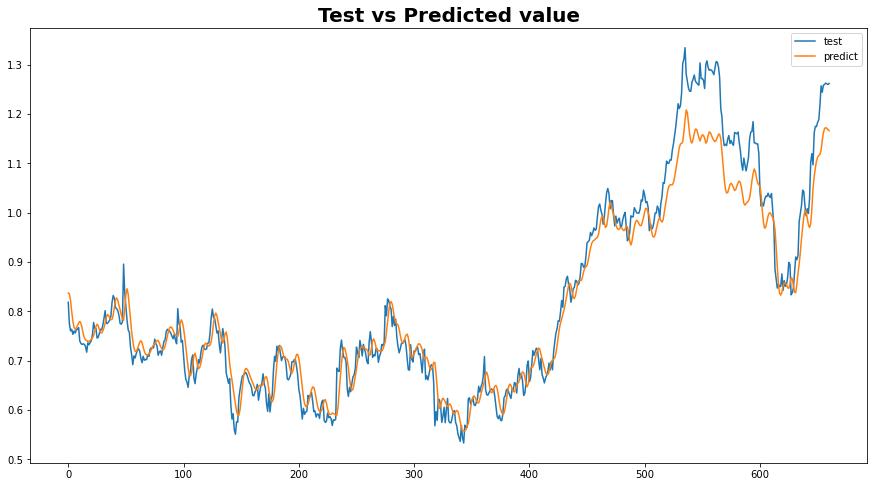

In [32]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
plt.show()

In [33]:
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),3)

print('R2 Score : ',r2)
print('Mean Squared error : ',mse)

R2 Score :  0.94
Mean Squared error :  0.002


## Results

As we can see, both the linear regression and lasso redression do the best job in predicting the closing stock price for the day. I learned from this analysis the importance of data preperation in being able to correctly fit a model which often times requires data transformation.